In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import cg
import matplotlib.pyplot as plt

In [2]:
# Function to create matrix A
def generate_matrix_A(n):
    e = np.ones(n)
    data = np.array([-e, 2*e, -e])
    offsets = np.array([-1, 0, 1])
    A = diags(data, offsets, shape=(n, n)).toarray()
    A[n-1, n-1] = 1  # Set A(n,n) = 1
    return A

In [5]:
# Function to create matrix B
def generate_vector_b(n):
    b = np.zeros(n)
    b[0] = 1
    return b


In [7]:
# Modified Conjugate Gradient Implementation with Tracking
def conjugate_gradient_track(A, b, tol=1e-6, max_iter=None):
    x = np.zeros_like(b)
    r = b - A.dot(x)
    p = r.copy()
    rs_old = np.dot(r, r)
    residual_norms = [np.sqrt(rs_old)]  # List to store residual norms
    
    if max_iter is None:
        max_iter = len(b)
    
    for i in range(max_iter):
        Ap = A.dot(p)
        pAp = np.dot(p, Ap)
        if pAp == 0:
            print("Encountered zero denominator in alpha computation.")
            break
        alpha = rs_old / pAp
        x += alpha * p
        r -= alpha * Ap
        rs_new = np.dot(r, r)
        residual_norms.append(np.sqrt(rs_new))
        
        if np.sqrt(rs_new) < tol:
            print(f"Converged in {i + 1} iterations.")
            break
        
        p = r + (rs_new / rs_old) * p
        rs_old = rs_new
    else:
        print("Maximum iterations reached without convergence.")
    
    return x, residual_norms


In [9]:
# Custom Conjugate Gradient Implementation
def conjugate_gradient(A, b, tol=1e-6, max_iter=None):
    x = np.zeros_like(b)  # Initial guess x0
    r = b - A.dot(x)      # Residual
    p = r.copy()
    rs_old = np.dot(r, r)
    
    if max_iter is None:
        max_iter = len(b)  # Set max_iter to n if not specified
    
    for i in range(max_iter):
        Ap = A.dot(p)
        pAp = np.dot(p, Ap)
        if pAp == 0:
            print("Encountered zero denominator in alpha computation.")
            break
        alpha = rs_old / pAp
        x += alpha * p
        r -= alpha * Ap
        rs_new = np.dot(r, r)
        
        if np.sqrt(rs_new) < tol:
            print(f"Converged in {i + 1} iterations.")
            break
        
        p = r + (rs_new / rs_old) * p
        rs_old = rs_new
        
    else:
        print("Maximum iterations reached without convergence.")
    
    return x

In [12]:
#Example usage
n = 100  # You can change this to 10, 50, 100, etc.
A = generate_matrix_A(n)
b = generate_vector_b(n)
    
x = conjugate_gradient(A, b, tol=1e-6)
    
# Verify the solution
x_true = np.ones(n)  # The true solution is a vector of ones
error = np.linalg.norm(x - x_true)
print(f"Solution error: {error}")

Converged in 100 iterations.
Solution error: 6.626226959482515e-13


Converged in 100 iterations.


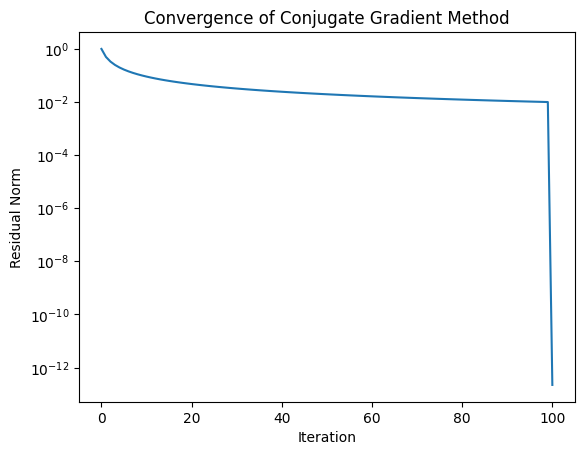

In [15]:
x, residuals = conjugate_gradient_track(A, b, tol=1e-6)
# You can now plot residuals vs. iterations to observe convergence
plt.semilogy(residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual Norm')
plt.title('Convergence of Conjugate Gradient Method')
plt.show()
